### Tatiana Frolova


### Rhode Island Police Database Part 2

### Questions:

1. Which gender commits more violations? In other words, how many different violations were committed by different gender and what is the conditional probability for different violations committed by gender?

2. Who is commonly stopped drug-related and has been arrested by gender? What is the Probability whose vehicle was being stopped related to drugs and arrested by gender?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### General data characteristics

In [2]:
# Data Police
police = pd.read_csv("police.csv")
police

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,1/4/2005,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,1/23/2005,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2/17/2005,4:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2/20/2005,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2/24/2005,1:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,RI,12/31/2015,21:21,NaN,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,RI,12/31/2015,21:59,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,RI,12/31/2015,22:04,NaN,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,RI,12/31/2015,22:09,NaN,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3


In [129]:
# Colomns
police.columns

Index(['state', 'stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type', 'stop_outcome', 'is_arrested', 'stop_duration',
       'drugs_related_stop', 'district'],
      dtype='object')

In [128]:
# General info
police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               91741 non-null  object 
 1   stop_date           91741 non-null  object 
 2   stop_time           91741 non-null  object 
 3   county_name         0 non-null      float64
 4   driver_gender       86536 non-null  object 
 5   driver_race         86539 non-null  object 
 6   violation_raw       86539 non-null  object 
 7   violation           86539 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3307 non-null   object 
 10  stop_outcome        86539 non-null  object 
 11  is_arrested         86539 non-null  object 
 12  stop_duration       86539 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
 14  district            91741 non-null  object 
dtypes: bool(2), float64(1), object(12)
memory usage: 9.3+

In [126]:
# Data Shape
police.shape

(91741, 15)

In [112]:
# Outcome by gender
police["driver_gender"].value_counts()

M    62762
F    23774
Name: driver_gender, dtype: int64

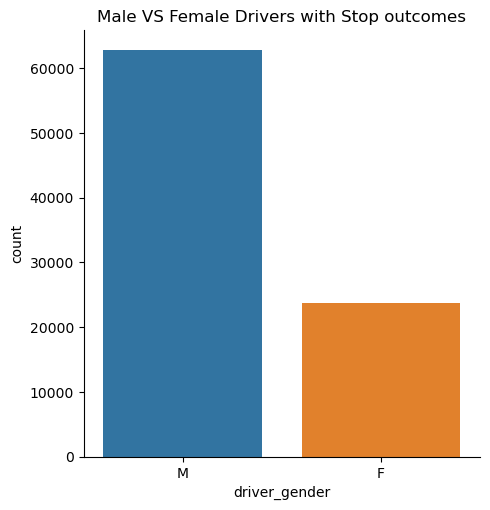

In [9]:
# Visualization by gender
sns.catplot(x= "driver_gender",
             data= police, 
             kind= "count")
plt.title("Male VS Female Drivers with Stop outcomes")
plt.show()

In [110]:
# Outcome by race
police["driver_race"].value_counts()

White       61872
Black       12285
Hispanic     9727
Asian        2390
Other         265
Name: driver_race, dtype: int64

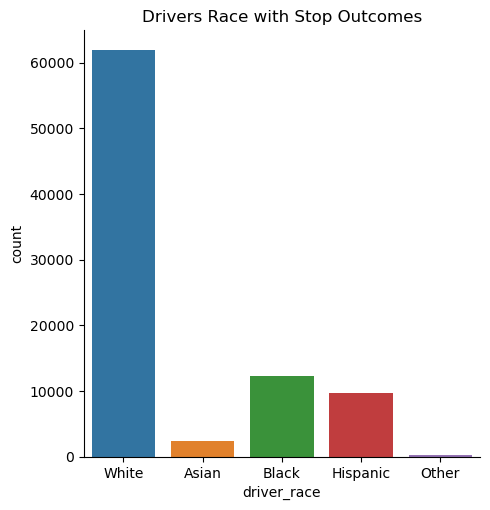

In [10]:
# Visualization by race
sns.catplot(x= "driver_race",
             data= police, 
             kind= "count")
plt.title("Drivers Race with Stop Outcomes")
plt.show()

In [34]:
# Violation
police["violation"].value_counts()

Speeding               48424
Moving violation       16224
Equipment              10922
Other                   4410
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64

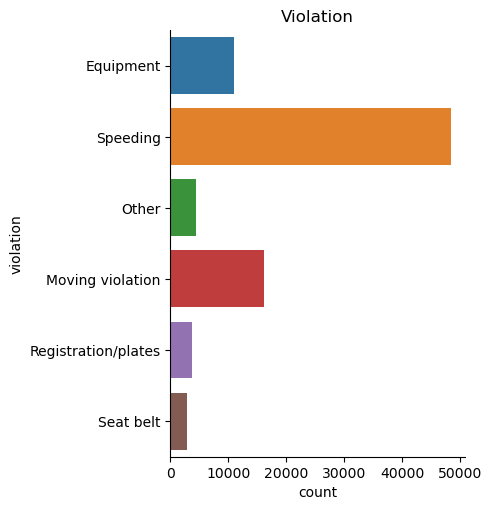

In [29]:
# Vizualization Stop outcomes by violation 
sns.catplot(y= "violation",
             data= police, 
             kind= "count")
plt.title("Violation")
plt.show()

In [32]:
# Stop duration times
police["stop_duration"].value_counts()

0-15 Min     69579
16-30 Min    13740
30+ Min       3220
Name: stop_duration, dtype: int64

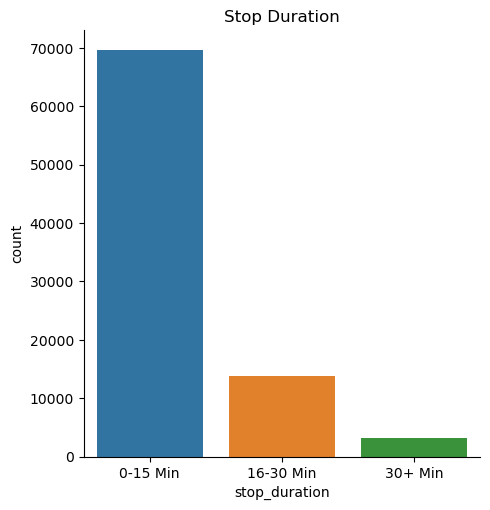

In [31]:
# Vizualization Stop duration
sns.catplot(x = "stop_duration",
             data= police, 
             kind= "count")
plt.title("Stop Duration")
plt.show()

### Question 1. Which gender commits more violations? In other words, how many different violations were committed by different gender and what is the conditional probability for different violations committed by gender?

#### Code to calculate Which gender commit more violations?

In [3]:
df = police[["driver_gender", "violation"]]

In [4]:
# General data, different violetions by genred
df_grouped = df.groupby("violation")["driver_gender"].value_counts()
df_grouped

violation            driver_gender
Equipment            M                 8420
                     F                 2501
Moving violation     M                12938
                     F                 3286
Other                M                 3702
                     F                  707
Registration/plates  M                 2647
                     F                 1056
Seat belt            M                 2278
                     F                  578
Speeding             M                32777
                     F                15646
Name: driver_gender, dtype: int64

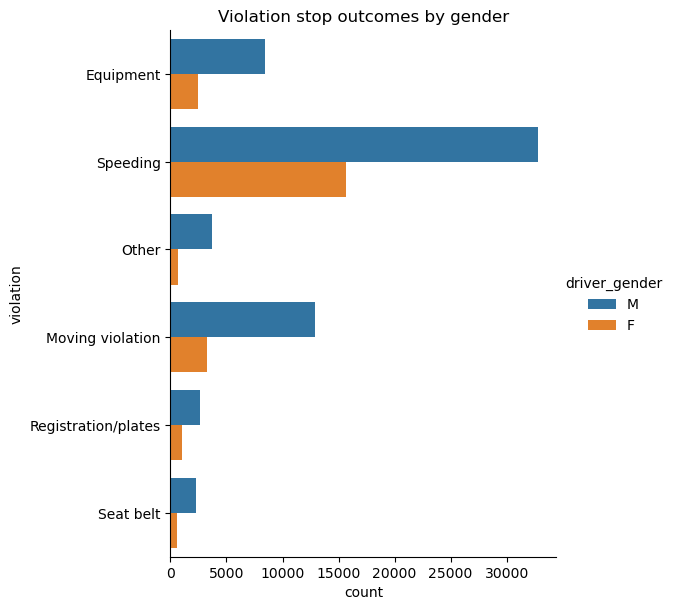

In [10]:
# Visualization. Violation stop outcomes by gender
sns.catplot(y= "violation", 
            data= df, 
            kind="count",
            hue= "driver_gender",
            height= 6)
plt.title("Violation stop outcomes by gender")
plt.show()

In [24]:
# Selecting rows for each gender
dfF = df.loc[df["driver_gender"] == "F"]
dfM = df.loc[df["driver_gender"] == "M"]

In [25]:
# Select violation row
equipment = df.loc[df["violation"] == "Equipment"]
moving = df.loc[df["violation"] == "Moving violation"]
other = df.loc[df["violation"] == "Other"]
registranion = df.loc[df["violation"] == "Registration/plates"]
belt = df.loc[df["violation"] == "Seat belt"]
speeding = df.loc[df["violation"] == "Speeding"]

In [26]:
# Selecting rows for each of violations for female 
equipmentF = dfF.loc[dfF["violation"] == "Equipment"]
movingF = dfF.loc[dfF["violation"] == "Moving violation"]
otherF = dfF.loc[dfF["violation"] == "Other"]
registranionF = dfF.loc[dfF["violation"] == "Registration/plates"]
beltF = dfF.loc[dfF["violation"] == "Seat belt"]
speedingF = dfF.loc[dfF["violation"] == "Speeding"]

In [27]:
# Selecting rows for each of violations for male 
equipmentM = dfM.loc[dfM["violation"] == "Equipment"]
movingM = dfM.loc[dfM["violation"] == "Moving violation"]
otherM = dfM.loc[dfM["violation"] == "Other"]
registranionM = dfM.loc[dfM["violation"] == "Registration/plates"]
beltM = dfM.loc[dfM["violation"] == "Seat belt"]
speedingM = dfM.loc[dfM["violation"] == "Speeding"]

#### Code to calculate Probability equipment violation by gender

In [32]:
# Count total equipment violations
count_equipment = equipment.count()
count_equipment

driver_gender    10921
violation        10922
dtype: int64

In [33]:
# Count female commit equipment violations
count_equipment_female = equipmentF.count()
count_equipment_female

driver_gender    2501
violation        2501
dtype: int64

In [34]:
# Count male commit equipment violations
count_equipment_male = equipmentM.count()
count_equipment_male

driver_gender    8420
violation        8420
dtype: int64

In [35]:
# Probability for female
probability_equipmet_female = (count_equipment_female/count_equipment) * 100
probability_equipmet_female.round(2)

driver_gender    22.9
violation        22.9
dtype: float64

In [36]:
# Probability for male
probability_equipmet_male = (count_equipment_male/count_equipment) * 100
probability_equipmet_male.round(2)

driver_gender    77.10
violation        77.09
dtype: float64

#### Code to calculate Probability moving violation by gender

In [28]:
# Count total moving violation
count_moving = moving.count()
count_moving

driver_gender    16224
violation        16224
dtype: int64

In [30]:
# Count female commit moving violation
count_moving_female = movingF.count()
count_moving_female

driver_gender    3286
violation        3286
dtype: int64

In [31]:
# Count male commit moving violation
count_moving_male = movingM.count()
count_moving_male

driver_gender    12938
violation        12938
dtype: int64

In [39]:
# Probability for female
probability_moving_female = (count_moving_female/count_moving) * 100
probability_moving_female.round(2)

driver_gender    20.25
violation        20.25
dtype: float64

In [40]:
# Probability for male
probability_moving_male = (count_moving_male/count_moving) * 100
probability_moving_male.round(2)

driver_gender    79.75
violation        79.75
dtype: float64

#### Code to calculate Probability other violations by gender

In [41]:
# Count total moving violation
count_other = other.count()
count_other

driver_gender    4409
violation        4410
dtype: int64

In [42]:
# Count female commit other violations
count_other_female = otherF.count()
count_other_female

driver_gender    707
violation        707
dtype: int64

In [43]:
# Count male commit other violations
count_other_male = otherM.count()
count_other_male

driver_gender    3702
violation        3702
dtype: int64

In [47]:
# Probability for female
probability_other_female = (count_other_female/count_other) * 100
probability_other_female.round(2)

driver_gender    16.04
violation        16.03
dtype: float64

In [45]:
# Probability for male
probability_other_male = (count_other_male/count_other) * 100
probability_other_male.round(1)

driver_gender    83.96
violation        83.95
dtype: float64

#### Code to calculate Probability registranion violations by gender

In [54]:
# Count total registranion violations
count_registranion = registranion.count()
count_registranion

driver_gender    3703
violation        3703
dtype: int64

In [55]:
# Count female commit registraniong violations
count_registranion_female = registranionF.count()
count_registranion_female

driver_gender    1056
violation        1056
dtype: int64

In [56]:
# Count male commit registranion violations
count_registranion_male = registranionM.count()
count_registranion_male

driver_gender    2647
violation        2647
dtype: int64

In [57]:
# Probability for female
probability_registranion_female = (count_registranion_female/count_registranion) * 100
probability_registranion_female.round(2)

driver_gender    28.52
violation        28.52
dtype: float64

In [58]:
# Probability for male
probability_registranion_male = (count_registranion_male/count_registranion) * 100
probability_registranion_male.round(2)

driver_gender    71.48
violation        71.48
dtype: float64

#### Code to calculate Probability seat belt violations by gender

In [59]:
# Count total seat belt violations
count_belt = belt.count()
count_belt

driver_gender    2856
violation        2856
dtype: int64

In [60]:
# Count female commit seat belt violations
count_belt_female = beltF.count()
count_belt_female

driver_gender    578
violation        578
dtype: int64

In [61]:
# Count male commit seat belt violations
count_belt_male = beltM.count()
count_belt_male

driver_gender    2278
violation        2278
dtype: int64

In [62]:
# Probability for female
probability_belt_female = (count_belt_female/count_belt) * 100
probability_belt_female.round(2)

driver_gender    20.24
violation        20.24
dtype: float64

In [63]:
# Probability for male
probability_belt_male = (count_belt_male/count_belt) * 100
probability_belt_male.round(2)

driver_gender    79.76
violation        79.76
dtype: float64

#### Code to calculate Probability speeding violations by gender

In [64]:
# Count total speeding violations
count_speeding = speeding.count()
count_speeding

driver_gender    48423
violation        48424
dtype: int64

In [65]:
# Count female commit speeding violations
count_speeding_female = speedingF.count()
count_speeding_female

driver_gender    15646
violation        15646
dtype: int64

In [66]:
# Count male commit speeding violations
count_speeding_male = speedingM.count()
count_speeding_male

driver_gender    32777
violation        32777
dtype: int64

In [67]:
# Probability for female
probability_speeding_female = (count_speeding_female/count_speeding) * 100
probability_speeding_female.round(2)

driver_gender    32.31
violation        32.31
dtype: float64

In [68]:
# Probability for male
probability_speeding_male = (count_speeding_male/count_speeding) * 100
probability_speeding_male.round(2)

driver_gender    67.69
violation        67.69
dtype: float64

#### Summary & Conclusion
Based on the statistical analysis we recived results:
##### Count diffrent violations by gender:
* Equipment violations commited by male 8420 times
* Equipment violations commited by female 2501 times
* Moving violations commited by male 12938 times
* Moving violations commited by female 3286 times
* Other violations commited by male 3702 times
* Other violations commited by female 707 times
* Registration/plates violations commited by male 2647 times
* Registration/plates violations commited by female 1056 times
* Seat belt violations commited by male 2278 times
* Seat belt violations commited by female 578 times
* Speeding violations commited by male 32777 times
* Speeding violations commited by female 15646 times

##### Probability of commited violations by gender:
* Probability that females commit an equipment violation is 22.9 % and males is 77.1 %
* Probability that females commit moving violation is 20.25 % and males is 79.75 %
* Probability that females drivers commit other violations is 16.04 % and males is 83.96 %
* Probability that females commit registranion violations is 28.52 % and males is 71.48%
* Probability that females commit seat belt violations is 20.24 % and males is 79.76 %
* Probability that females commit speeding violations is 32.31 % and males is 67.69 %

We conclude that overal males commit to more violations because male violation probability is higher that females at each violation, however females commit hight % of speeding violations and registration violations compared to other violations.

### Question 2. Who is commonly stopped drug-related and has been arrested by gender? What is the Probability whose vehicle was being stopped related to drugs and arrested by gender?

#### Code calculateing count vehicles stopped related to drugs and arrested by gender

In [46]:
police.head(3)

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,1/4/2005,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,1/23/2005,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2/17/2005,4:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


In [47]:
# select a new dataframe
da= police[["driver_gender", "stop_outcome", "drugs_related_stop"]]
da.head(3)

,driver_gender,stop_outcome,drugs_related_stop
0,M,Citation,False
1,M,Citation,False
2,M,Citation,False


In [49]:
# Count drivers who stopped drug related 
drug = da[da["drugs_related_stop"] == True].driver_gender.value_counts() 
drug

M    755
F    107
Name: driver_gender, dtype: int64

In [50]:
# Count drivers who got arrested
arrested = da[da["stop_outcome"] == "Arrest Driver"].driver_gender.value_counts()
arrested

M    2179
F     556
Name: driver_gender, dtype: int64

In [51]:
# drivers who stopped drug related and arrested 
drug = da["drugs_related_stop"] == True
arrested = da["stop_outcome"] == "Arrest Driver"
drug_arrest = da[(drug) & (arrested)].driver_gender.value_counts()

In [52]:
# Count drivers got arrested who drug related stopped
drug_arrest

M    167
F     24
Name: driver_gender, dtype: int64

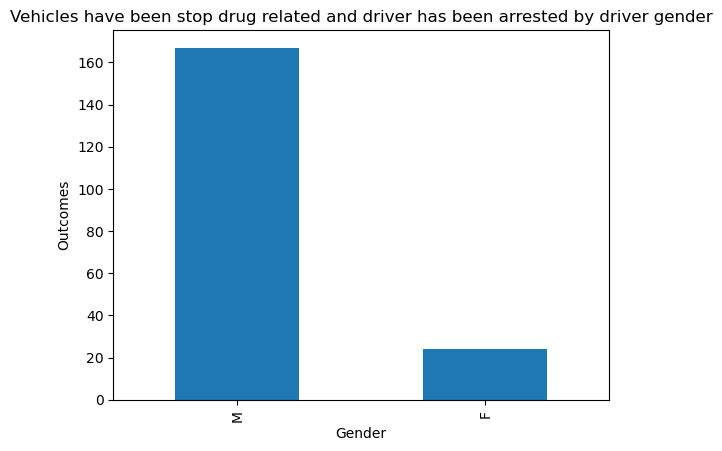

In [54]:
drug_arrest.plot(kind ="bar", title = "Vehicles have been stop drug related and driver has been arrested by driver gender")
plt.xlabel("Gender")
plt.ylabel("Outcomes")
plt.show()

#### Code to calculating probability for drivers who got stop drug related and got arrested

In [53]:
# Count drivers were stopped drug related and arrested
count_drug_arrested = da.loc[(da["drugs_related_stop"] == True) & (da["stop_outcome"] == "Arrest Driver")].count()
count_drug_arrested

driver_gender         191
stop_outcome          191
drugs_related_stop    191
dtype: int64

In [54]:
# Rows for male and female
da_male = da.loc[da["driver_gender"] == "M"]
da_female = da.loc[da["driver_gender"] == "F"]

In [56]:
# count male drivers who got stoped related to drugs and arrested
count_drug_arrested_male = da_male.loc[(da_male["drugs_related_stop"] == True) & (da_male["stop_outcome"] == "Arrest Driver")].count()
count_drug_arrested_male

driver_gender         167
stop_outcome          167
drugs_related_stop    167
dtype: int64

In [57]:
# count female drivers who got stoped related to drugs and arrested
count_drug_arrested_female = da_female.loc[(da_female["drugs_related_stop"] == True) & (da_female["stop_outcome"] == "Arrest Driver")].count()
count_drug_arrested_female

driver_gender         24
stop_outcome          24
drugs_related_stop    24
dtype: int64

In [58]:
# Probability drug related stops and male driver got arrested
probability_drug_arrested_male = (count_drug_arrested_male/count_drug_arrested) * 100
probability_drug_arrested_male.round(2)

driver_gender         87.43
stop_outcome          87.43
drugs_related_stop    87.43
dtype: float64

In [59]:
# Probability drug related stops and female driver got arrested
probability_drug_arrested_female = (count_drug_arrested_female/count_drug_arrested) * 100
probability_drug_arrested_female.round(2)

driver_gender         12.57
stop_outcome          12.57
drugs_related_stop    12.57
dtype: float64

#### Summary & Conclusion
Based on the statistical analysis we recived results:
##### Count drivers stopped drug related by gender:
* 755 male drivers stopped drug related
* 107 female drivers stopped drug related

##### Count drivers got arrested by gender:
* 2179 male drivers got arrested
* 556 female drivers got arrested

##### Count drivers got arrested to drug related stops by gender:
* 167 male drivers got arrested to drug related stops
* 24 female drivers got arrested to drug related stops

##### Probability drivers got arrested to drug related stops by gender:
* Probability that males drivers got arrested to drug related stops 87.43%
* Probability that female  12.57%

We conclude that overall males got more commonly stopped drug related and male got commonly arrested than females. Male got commonly arrested to drug related stops than females because the probability extrimely higher that females.